In [1]:
import mitsuba as mi 
from matplotlib import pyplot as plt
mi.set_variant("cuda_ad_rgb")
import drjit as dr
from PDE3D.BoundaryShape import *
from PDE3D import PATH
from PDE3D.utils import *


In [2]:
source_p = {}
source_p["radius"] = 0.8
source_p["val"] = 1
def source_generator(points, params):
    return dr.select(dr.norm(points) < params["radius"], params["val"], 0.0)
f = FunctionCoefficient("source", source_p, source_generator)

In [3]:
sphere = Sphere(radius = 1)
slice = Slice(offset = 0.4, scale = 1.2, axis = "z")
cmap= "coolwarm"
cam_origin = mi.Point3f([-1.0,1.0,2])
image, norm = sphere.visualize(slice = slice, coeff = f, colormap = cmap, cam_origin= cam_origin, image_res=[512, 512])

[0.0, 1.0]


In [4]:
a = mi.BoundingBox3f([-1., -1., -1.],[1.,1.,1.])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.01555616..1.5726548].


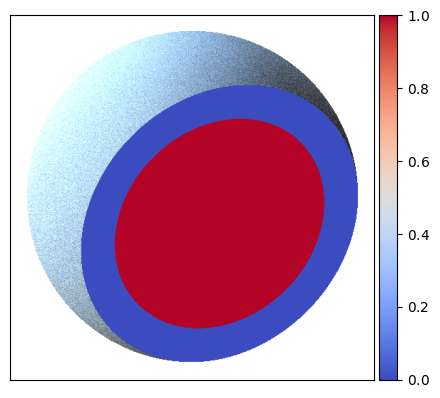

In [5]:
fig, ax = plt.subplots(1,1,figsize = (5,5))
plot_image_3D(image, ax, norm = norm, cmap = cmap)

[1.0, 13.0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.5726548].


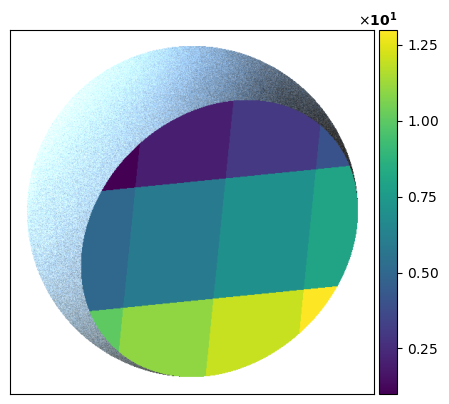

In [6]:
slice_image = mi.TensorXf([[1,2,3,4],
                           [5,6,7,8],
                           [10,11,12,13]])

image, norm = sphere.visualize(slice = slice, slice_image = slice_image, colormap = "viridis", cam_origin= cam_origin, image_res=[512, 512])
fig, ax = plt.subplots(1,1,figsize = (5,5))
plot_image_3D(image, ax, norm = norm, cmap = "viridis")

In [7]:
a = dr.meshgrid(dr.arange(mi.Float, 3),dr.arange(mi.Float, 3),dr.arange(mi.Float, 3), indexing = "xy")

In [8]:
mi.Point3f(a[0], a[1], a[2]) + mi.Point3f(1,1,1)

[[1, 1, 1],
 [1, 1, 2],
 [1, 1, 3],
 .. 21 skipped ..,
 [3, 3, 1],
 [3, 3, 2],
 [3, 3, 3]]

In [9]:
create_bbox_points(mi.BoundingBox3f([-1,-1,-1], [1,1,1]), [256, 256, 256], spp = 2)

[[-0.998872, -0.996812, -0.994262],
 [-0.99835, -0.99738, -0.998556],
 [-0.997222, -0.994164, -0.985756],
 .. 33554426 skipped ..,
 [0.994229, 0.997223, 0.98739],
 [0.995718, 0.996678, 0.996263],
 [0.999386, 0.997201, 0.99606]]